## Most Probable Distribution and Ising Model

## Prepare the notebook

In [1]:
import sys

In [2]:
sys.path.append('../app')

In [3]:
from utils.model import Ising

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

## Calculate distributions

Define a function to generate the distributions

In [11]:
def _calc_distribution(ising_param):
    
    ising = Ising(ising_param)
    ising.distribution()
    states = ising.dist.get('states')
    total_states = ising.dist.get('total_states')
    energies = [i.get('energy') for i in states]
    dist = [i.get('dist') for i in states]
    dist.sort
    spin_dist = [i.get('spin_dist') for i in states]
    
    return energies, total_states, dist,spin_dist

In [13]:
test = [{-4: 8},
  {-4: 1, 0: 2, 4: 1},
  {0: 2, -4: 1, 4: 1},
  {0: 8},
  {0: 2, 4: 1, -4: 1},
  {0: 8},
  {4: 8},
  {4: 1, 0: 2, -4: 1},
  {4: 1, 0: 2, -4: 1},
  {4: 8},
  {0: 8},
  {0: 2, 4: 1, -4: 1},
  {0: 8},
  {0: 2, -4: 1, 4: 1},
  {-4: 1, 0: 2, 4: 1},
  {-4: 8}]

In [17]:
{0: 2, -4: 1, 4: 1}

{0: 2, -4: 1, 4: 1}

In [12]:
_calc_distribution({
        'width': 2,
        'height': 2
    })

([-2.5,
  0.75,
  0.75,
  0.0,
  -0.75,
  0.0,
  2.5,
  -0.75,
  -0.75,
  2.5,
  0.0,
  -0.75,
  0.0,
  0.75,
  0.75,
  -2.5],
 16,
 [{-4: 8},
  {-4: 1, 0: 2, 4: 1},
  {0: 2, -4: 1, 4: 1},
  {0: 8},
  {0: 2, 4: 1, -4: 1},
  {0: 8},
  {4: 8},
  {4: 1, 0: 2, -4: 1},
  {4: 1, 0: 2, -4: 1},
  {4: 8},
  {0: 8},
  {0: 2, 4: 1, -4: 1},
  {0: 8},
  {0: 2, -4: 1, 4: 1},
  {-4: 1, 0: 2, 4: 1},
  {-4: 8}],
 [{-1: 4, 1: 0},
  {-1: 3, 1: 1},
  {-1: 3, 1: 1},
  {-1: 2, 1: 2},
  {-1: 3, 1: 1},
  {-1: 2, 1: 2},
  {-1: 2, 1: 2},
  {-1: 1, 1: 3},
  {-1: 3, 1: 1},
  {-1: 2, 1: 2},
  {-1: 2, 1: 2},
  {-1: 1, 1: 3},
  {-1: 2, 1: 2},
  {-1: 1, 1: 3},
  {-1: 1, 1: 3},
  {-1: 0, 1: 4}])

Configure Ising model

In [28]:
ising_params = [
    {
        'width': 2,
        'height': 2
    },
    {
        'width': 3,
        'height': 3
    },
    {
        'width': 4,
        'height': 4
    },
    {
        'width': 5,
        'height': 5
    }
]

Calculate and plot the histogram of the energies

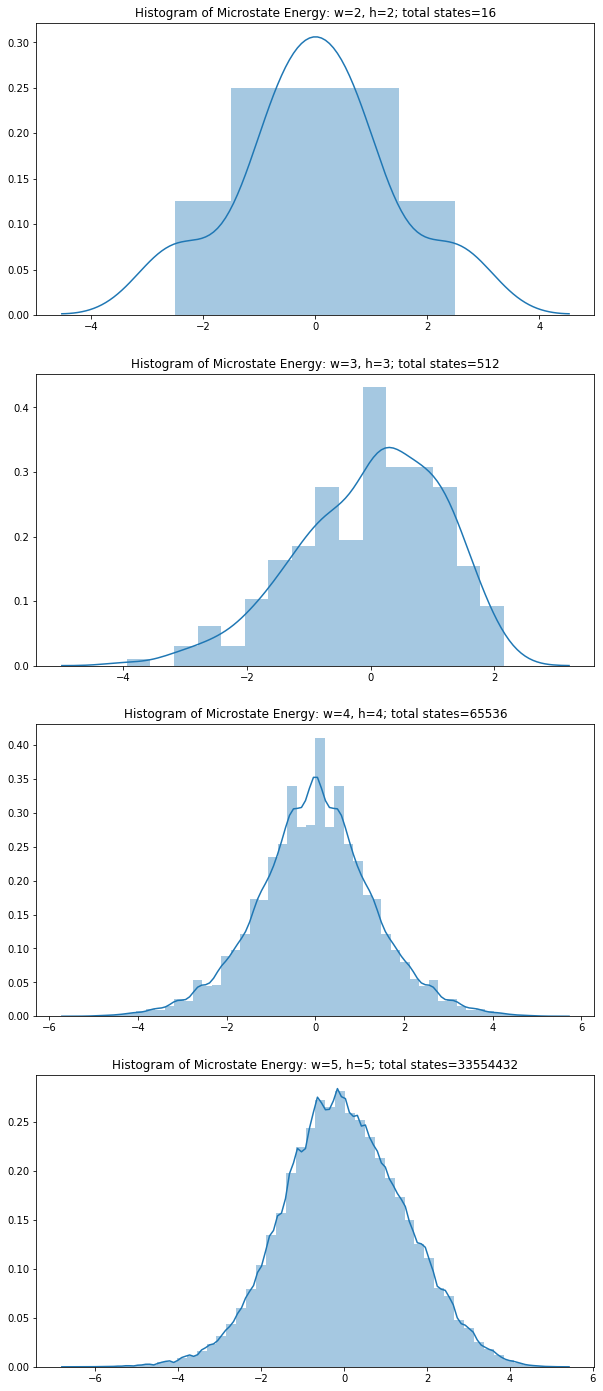

In [20]:
nrows=len(ising_params)

fig, ax = plt.subplots(nrows=nrows, figsize=(10, nrows * 6.18))

ax_flag = 0
for param in ising_params:
    ax_i = ax[ax_flag]
    energies, total_states = _calc_distribution(param)
    sns.distplot(energies, ax=ax_i)
    ax_i.set_title('Histogram of Microstate Energy: w={}, h={}; total states={}'.format(
        param.get('width'), param.get('height'), total_states
    ))
    ax_flag += 1

Extract energies 

In [44]:
%%timeit
_calc_distribution(ising_params[1])

9.65 ms ± 83.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [45]:
%%timeit
_calc_distribution(ising_params[2])

2.05 s ± 40 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We will need `512*2` seconds to calculate height=5 and width=5

In [10]:
((1,1), (1,-1)).count(-1)

0

In [13]:
sum(
    list(
        ((1,1), (1,-1))
    ),
    ()
)

(1, 1, 1, -1)